In [49]:
import pickle
import sys
from typing import Literal
import numpy as np

In [50]:
axis_font_size = 14
title_font_size = 16
fig_title_font_size = 18
legend_font_size = 14

np.float64(0.7639639639639639)

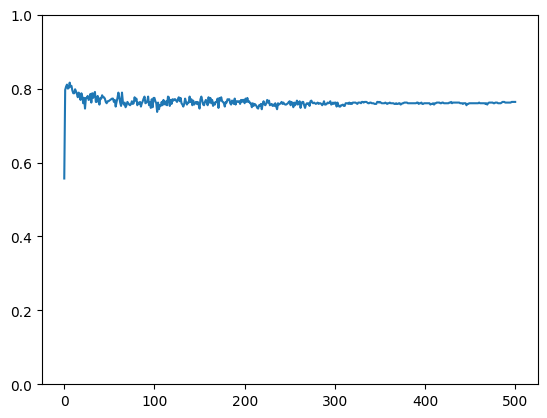

In [51]:
folderStr = f"{sys.path[-1]}/../../../../experiment1ResultsMLP/dataPercentage=10p_nets=Net1largelayer_learningRates=0.01_epochs=500/"

data = None
with open(folderStr + "accuracy_mean.txt", "rb") as f:
    data = pickle.load(f)

import matplotlib.pyplot as plt
plt.plot(data)

# Set limits on the y_axis
plt.ylim(0, 1)
data[-1]

In [52]:
MLPMetric = Literal["accuracy", "precision", "recall", "f1", "test_loss", "train_loss"]
DataPercentage = Literal["10p", "50p", "100p"]
Nets = Literal["Net1largelayer", "Net1layer", "Net2layer", "Net3layer"]
LearningRate = Literal["0.01", "0.001", "0.0001"]

def get_MLP_run_metric(metric: MLPMetric, dataPercentage: DataPercentage, net: Nets, learningRate: LearningRate) -> tuple[list[float], list[float]]:
    folderStr = f"{sys.path[-1]}/../../../../experiment1ResultsMLP/dataPercentage={dataPercentage}_nets={net}_learningRates={learningRate}_epochs=500/"

    mean_data = None
    with open(folderStr + f"{metric}_mean.txt", "rb") as f:
        mean_data = pickle.load(f)

    var_data = None
    with open(folderStr + f"{metric}_var.txt", "rb") as f:
        var_data = pickle.load(f)

    return mean_data, var_data
    

In [53]:
XGBMetric = Literal["accuracy", "precision", "recall", "f1", "auc"]
Etas = Literal["0.1", "0.2"]
Subsamples = Literal["0.6", "1"]
MaxDepths = Literal["8", "10"]

def get_XGB_run_metric(metric: XGBMetric, dataPercentage: DataPercentage, eta: Etas, max_depth: MaxDepths, subsample: Subsamples) -> tuple[list[float], list[float]]:
    folderStr = f"{sys.path[-1]}/../../../../experiment1ResultsXGB/dataPercentage={dataPercentage}_eta={eta}_max_depth={max_depth}_subsample={subsample}/"

    mean_data = None
    with open(folderStr + f"{metric}_mean.txt", "rb") as f:
        mean_data = pickle.load(f)

    var_data = None
    with open(folderStr + f"{metric}_var.txt", "rb") as f:
        var_data = pickle.load(f)

    return np.array(mean_data), np.array(var_data)

In [54]:
class plot:
    def __init__(self, title: str, plot_dim: int = (1, 1)):
        fig, ax = plt.subplots(nrows=plot_dim[0], ncols=plot_dim[1])
        self.fig = fig
        self.ax = [ax] if plot_dim == (1, 1) else ax
        (
            self.ax[0].set_title(title)
            if plot_dim == (1, 1)
            else [ax.set_title(title) for ax in self.ax.flatten()]
        )
        self.fig.set_size_inches(12, 8)
        self.fig.subplots_adjust(hspace=0.3)

    def get_fig_ax(self):
        return self.fig, self.ax

    def plot_mean_var(
        self,
        index: int,
        name: str,
        mean_data: np.ndarray,
        var_data: np.ndarray,
        xlabel: str,
        ylabel: str,
        title: str = None,
        ylims: float = None,
        xlims: float = None,
        include_labels: bool = False,
    ):

        rounds = range(1, len(mean_data) + 1)

        if include_labels:
            self.ax[index].plot(rounds, mean_data, label=f"{name} (Mean)")
        else:
            self.ax[index].plot(rounds, mean_data)

        self.ax[index].fill_between(
            rounds,
            mean_data - var_data,
            mean_data + var_data,
            alpha=0.1,
            # label=f"{name} (Standard Deviation)",
        )

        self.ax[index].set_xlabel(xlabel, fontsize=axis_font_size)

        self.ax[index].set_ylabel(ylabel, fontsize=axis_font_size)

        self.ax[index].set_ylim(ylims if ylims else None)
        self.ax[index].set_xlim(xlims if xlims else None)
        if title:
            self.ax[index].set_title(title, fontsize=title_font_size)

        self.ax[index].grid(True)

    def plot_max_line(self, index: int, name: str, values, c="r", include_labels: bool = False):
        max_value = max(values)
        if include_labels:
            self.ax[index].axhline(
                y=max_value, color=c, linestyle="--", label=f"{name} (Max Value)"
            )
        else:
            self.ax[index].axhline(
                y=max_value, color=c, linestyle="--"
            )

    def save_as_svg(self, filename: str):
        self.fig.savefig(filename, format="svg", bbox_inches="tight")

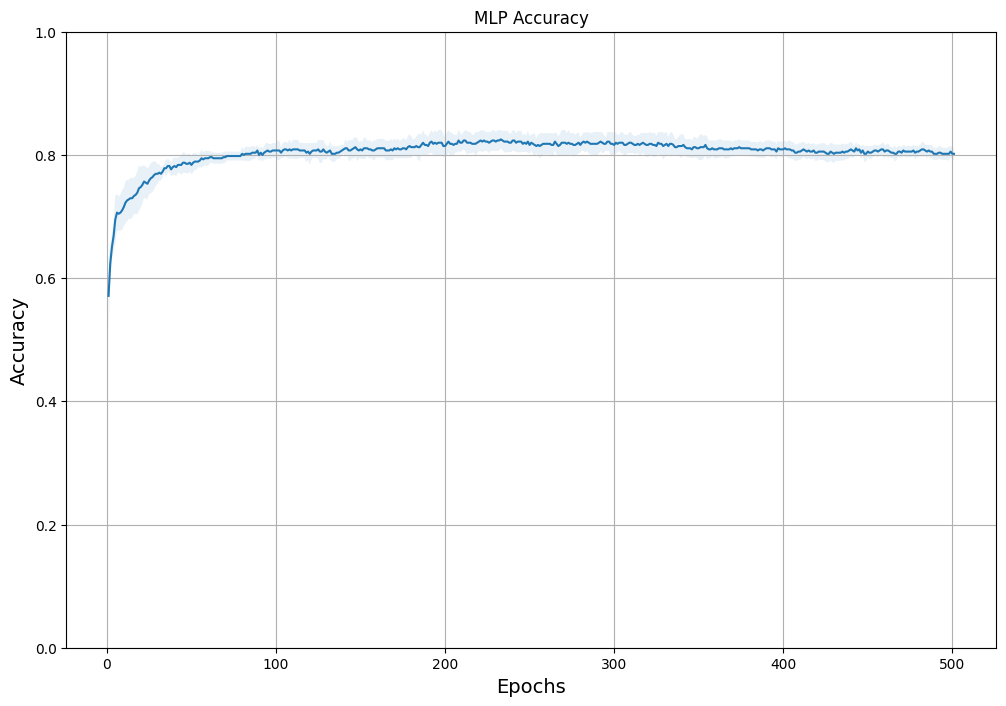

In [55]:
m, v = get_MLP_run_metric("accuracy", "10p", "Net1largelayer", "0.0001")

p = plot(title="MLP Accuracy")

p.plot_mean_var(0, "MLP", m, v, "Epochs", "Accuracy", ylims=(0, 1))

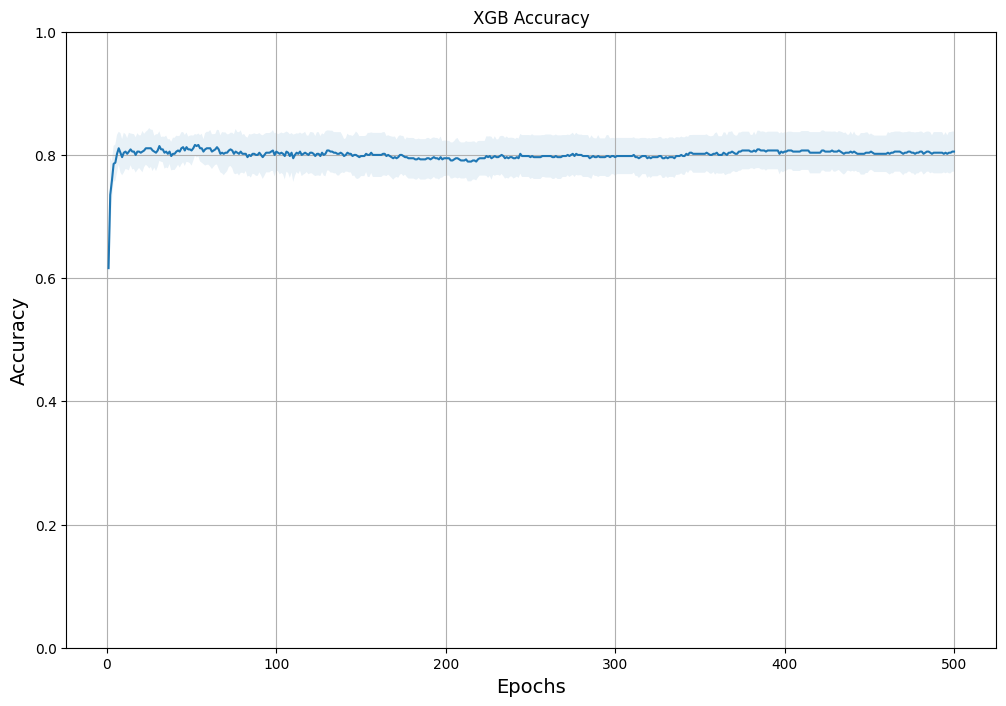

In [56]:
m, v = get_XGB_run_metric("accuracy", "10p", "0.1", "10", "0.5")

p = plot(title="XGB Accuracy")

p.plot_mean_var(0, "XGB", m, v, "Epochs", "Accuracy", ylims=(0, 1))

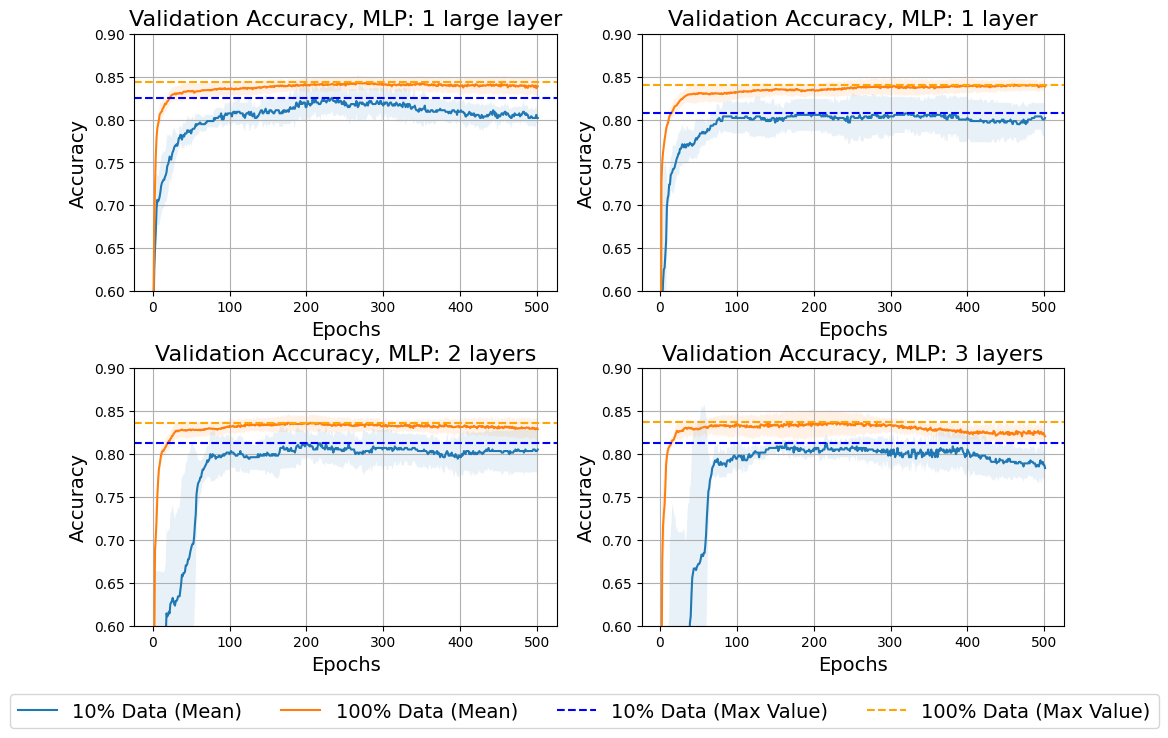

In [61]:
p = plot(title="MLP overfit accuracy", plot_dim=(2, 2))

network1 = "Net1largelayer"
network2 = "Net1layer"
network3 = "Net2layer"
network4 = "Net3layer"

lr = "0.0001"


def plot_MLP_10_vs_100_accuracy(
    network: str,
    lr: str,
    p: plot,
    index,
    include_max: bool = True,
    x_lims: tuple = None,
    y_lims: tuple = None,
    add_name: str = "",
    additional_title: str = "",
    change_title: bool = True,
    include_labels: bool = False,
):
    m_mlp10, sd_mlp10 = get_MLP_run_metric("accuracy", "10p", network, lr)
    p.plot_mean_var(
        index,
        "10% Data" + (f" ({add_name})" if add_name else ""),
        m_mlp10,
        sd_mlp10,
        "Epochs",
        "Accuracy",
        ylims=(0, 1) if not y_lims else y_lims,
        xlims=x_lims,
        title="Validation Accuracy" + additional_title,
        include_labels=include_labels,
    )
    m_mlp100, sd_mlp100 = get_MLP_run_metric("accuracy", "100p", network, lr)
    p.plot_mean_var(
        index,
        "100% Data" + (f" ({add_name})" if add_name else ""),
        m_mlp100,
        sd_mlp100,
        "Epochs",
        "Accuracy",
        ylims=(0, 1) if not y_lims else y_lims,
        xlims=x_lims,
        include_labels=include_labels,
    )

    if include_max:
        p.plot_max_line(
            index, "10% Data", m_mlp10, c="blue", include_labels=include_labels
        )
        p.plot_max_line(
            index, "100% Data", m_mlp100, c="orange", include_labels=include_labels
        )


plot_MLP_10_vs_100_accuracy(
    network1, lr, p, (0, 0), y_lims=(0.6, 0.9), include_labels=True, additional_title=", MLP: 1 large layer"
)
plot_MLP_10_vs_100_accuracy(network2, lr, p, (0, 1), y_lims=(0.6, 0.9), additional_title=", MLP: 1 layer")
plot_MLP_10_vs_100_accuracy(network3, lr, p, (1, 0), y_lims=(0.6, 0.9), additional_title=", MLP: 2 layers")
plot_MLP_10_vs_100_accuracy(network4, lr, p, (1, 1), y_lims=(0.6, 0.9), additional_title=", MLP: 3 layers")

fig, ax = p.get_fig_ax()

fig.legend(loc="lower center", ncol=4, fontsize=legend_font_size)
fig.subplots_adjust(bottom=0.14)

p.save_as_svg("MLP_overfit_model.svg")

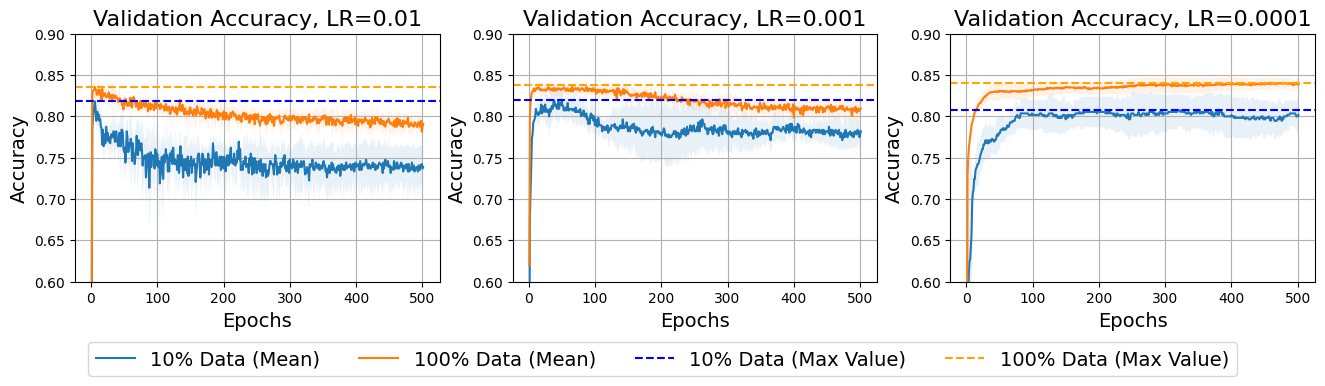

In [62]:

p = plot(title="MLP overfit accuracy", plot_dim=(1, 3))

network1 = "Net1layer"

ylims = (0.6, 0.9)
plot_MLP_10_vs_100_accuracy(network1, "0.01", p, (0), y_lims=ylims, include_labels=True, additional_title=", LR=0.01")
plot_MLP_10_vs_100_accuracy(network1, "0.001", p, (1), y_lims=ylims, additional_title=", LR=0.001")
plot_MLP_10_vs_100_accuracy(network1, "0.0001", p, (2), y_lims=ylims, additional_title=", LR=0.0001")

    
fig, ax = p.get_fig_ax()

fig.legend(loc="lower center", ncol=4, fontsize=legend_font_size)

fig.set_size_inches(16, 4)
# Add space between subplots and legend
fig.subplots_adjust(bottom=0.26)

p.save_as_svg("MLP_overfit_lr.svg")

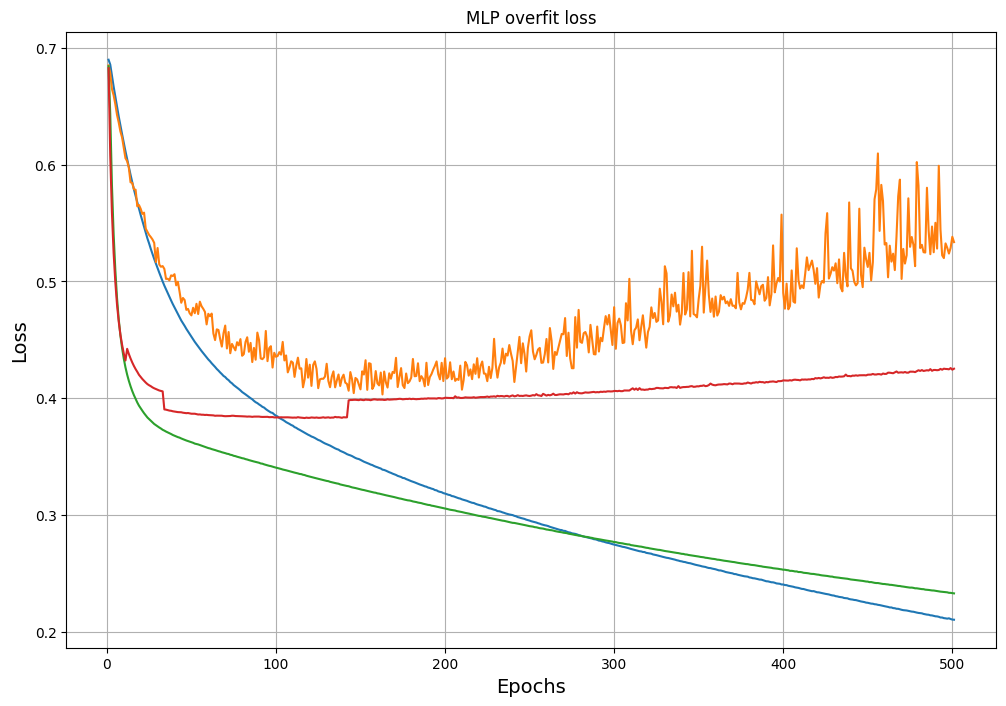

In [59]:
p = plot(title="MLP overfit loss")

network = "Net1largelayer"

# Plot MLP
m_mlp10train, sd_mlp10train = get_MLP_run_metric("train_loss", "10p", network, "0.0001")
p.plot_mean_var(0, "MLP 10% train", m_mlp10train, 0, "Epochs", "Loss")
m_mlp10test, sd_mlp10test = get_MLP_run_metric("test_loss", "10p", network, "0.0001")
p.plot_mean_var(0, "MLP 10% test", m_mlp10test, 0, "Epochs", "Loss")

m_mlp100train, sd_mlp100train = get_MLP_run_metric("train_loss", "100p", network, "0.0001")
p.plot_mean_var(0, "MLP 100% train", m_mlp100train, 0, "Epochs", "Loss")
m_mlp100test, sd_mlp100test = get_MLP_run_metric("test_loss", "100p", network, "0.0001")
p.plot_mean_var(0, "MLP 100% test", m_mlp100test, 0, "Epochs", "Loss")


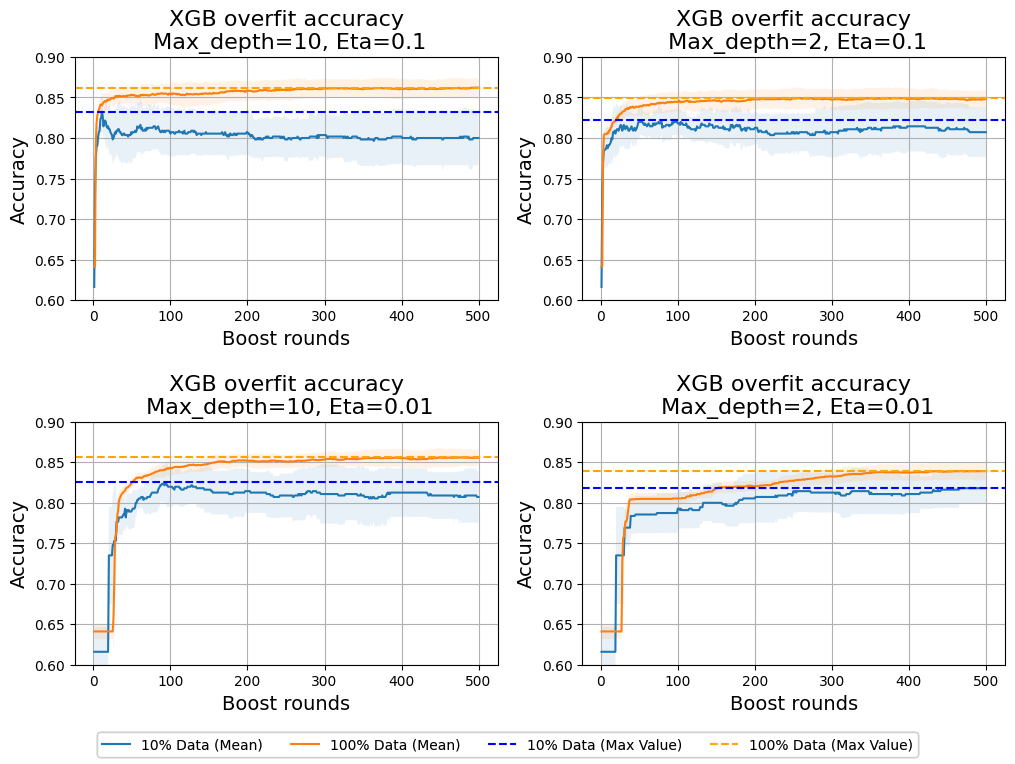

In [60]:
p = plot(title="XGB overfit accuracy", plot_dim=(2, 2))


def plot_XGB_10_vs_100_accuracy(max_depth: str, eta: str, p: plot, index, ylims: tuple = (0, 1), include_labels: bool = False):
    m_xgb10, sd_xgb10 = get_XGB_run_metric("accuracy", "10p", eta, max_depth, "1")
    p.plot_mean_var(index, "10% Data", m_xgb10, sd_xgb10, "Boost rounds", "Accuracy", ylims=ylims, title=f"XGB overfit accuracy\n Max_depth={max_depth}, Eta={eta}", include_labels=include_labels)
    m_xgb100, sd_xgb100 = get_XGB_run_metric("accuracy", "100p", eta, max_depth, "1")
    p.plot_mean_var(index, "100% Data", m_xgb100, sd_xgb100, "Boost rounds", "Accuracy", ylims=ylims, include_labels=include_labels)


    p.plot_max_line(index, "10% Data", m_xgb10, c="blue", include_labels=include_labels)
    p.plot_max_line(index, "100% Data", m_xgb100, c="orange", include_labels=include_labels)

    fig, ax = p.get_fig_ax()
    fig.legend(loc="lower center", ncol=4)
    fig.subplots_adjust(bottom=0.12, hspace=0.5)

ylims = (0.6, 0.9)

plot_XGB_10_vs_100_accuracy("10", "0.1", p, (0, 0), ylims=ylims, include_labels=True)
plot_XGB_10_vs_100_accuracy("2", "0.1", p, (0, 1), ylims=ylims)
plot_XGB_10_vs_100_accuracy("10", "0.01", p, (1, 0), ylims=ylims)
plot_XGB_10_vs_100_accuracy("2", "0.01", p, (1, 1), ylims=ylims)

p.save_as_svg("XGB_overfit_accuracy.svg")